In [1]:
import os
import sys
sys.path.append(os.path.abspath('../PyTests'))
sys.path.append(os.path.abspath('..'))
import numpy as np
import matplotlib.pyplot as plt
import utilitiesForTests as tUtil
import Util.plot as uPlt
import PyTests.mathieson_p
import PyTests.clusterProcessOnMCData_t as clustering

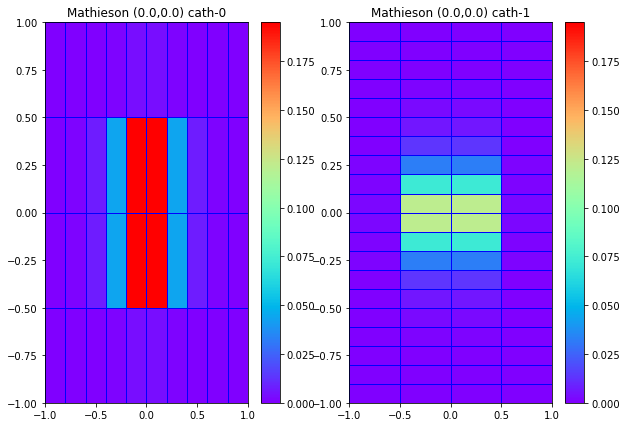

mu=0.0,0.0 sum z=1.9995473995047135


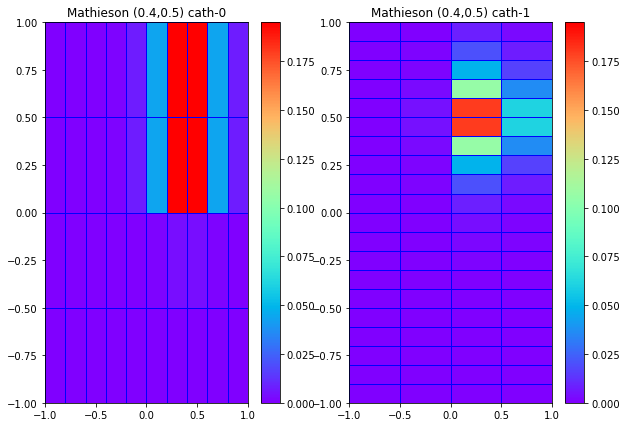

mu=0.4,0.5 sum z=1.9814387465774852
sum zMix 1.9899488032212713


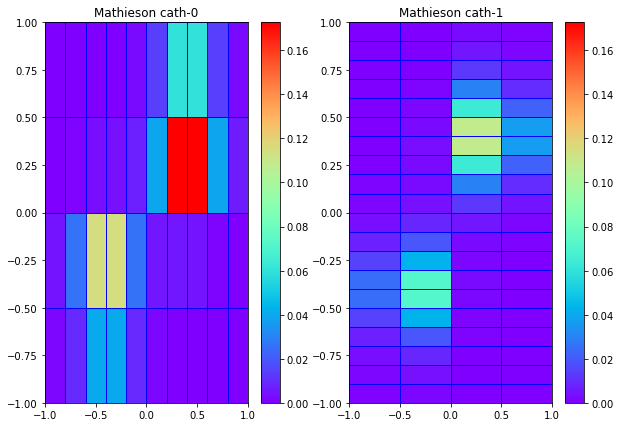

In [2]:
PyTests.mathieson_p.makePlots(npads_cath0=[10,4],npads_cath1=[4,20])

In [3]:
x0,y0,dx0,dy0=tUtil.buildPads( 16, 8, -2.0, 2.0, -2.0, 2.0 )

In [4]:
x0[:2], dx0[:2], y0[:2], dy0[:2]

(array([-1.875, -1.625]),
 array([0.125, 0.125]),
 array([-1.75, -1.75]),
 array([0.25, 0.25]))

In [5]:
z0=np.ones(len(x0))
odd=np.arange(0,len(z0),1)%2==0
z0[odd]=0

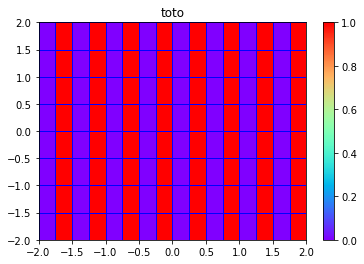

In [6]:
fig,ax = plt.subplots()
uPlt.setLUTScale(0.0,1.0)
uPlt.drawPads(fig,ax,x0,y0,dx0,dy0,z0,title="toto")

In [12]:
import Util.IOv5 as IO
import awkward as ak
recoData = IO.PreCluster()

In [13]:
recoData.read()

50

In [81]:
clusters=ak.zip({"x":recoData.rClusterX,"y":recoData.rClusterY,"id":recoData.rClusterId,"deid":recoData.rClusterDEId})

In [357]:
ak.type(clusters)

50 * var * var * {"x": float64, "y": float64, "id": int64, "deid": int64}

In [190]:
pads=ak.Array(ak.zip({
    "event": recoData.evId,
    "x":recoData.padX,
    "y":recoData.padY,
    "dx":recoData.padDX,
    "dy":recoData.padDY,
    "id": recoData.padId,
    "deid": recoData.padDEId,
    "q":recoData.padCharge,
    "cath":recoData.padCath,
    "sat":recoData.padSaturated
            }))

In [397]:
ievent=0
reco=[z for z in filter(None,pads[ievent][pads[ievent].deid==100].to_list())]
ref=[z for z in filter(None,clusters[ievent][clusters[ievent].deid==100].to_list())]
ref=ak.Array(ref)
ref.to_list()

[[{'x': 20.051032485961915,
   'y': 7.216840286254882,
   'id': 13107200,
   'deid': 100}],
 [{'x': 54.70323699951172,
   'y': 30.41733123779297,
   'id': 13107201,
   'deid': 100}],
 [{'x': 45.89095825195312,
   'y': 43.33704330444336,
   'id': 13107202,
   'deid': 100}],
 [{'x': 14.178608360290527,
   'y': 40.894160766601566,
   'id': 13107203,
   'deid': 100}]]

(0.0, 120.0)

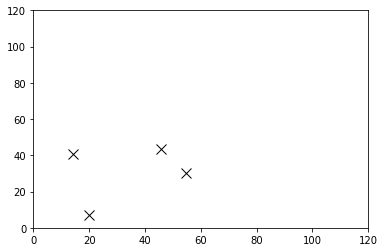

In [410]:
fig,ax = plt.subplots()
uPlt.setLUTScale(0.0,1)
#uPlt.drawPads(fig,ax,pc.x.to_numpy(),pc.y.to_numpy(),pc.dx.to_numpy(),pc.dy.to_numpy(),pc.cath.to_numpy(),alpha=0.5)
plt.plot(ref.x,ref.y,marker="x",markersize=10,color="black",linewidth=0)
ax.set_xlim([0,120])
ax.set_ylim([0,120])

In [310]:
d=pads.deid==100
cath1=pads.cath==1
event0=pads.event==0
q=pads.q>40
pads[d&cath1&event0&q]

<Array [[[{event: 0, x: 20.2, ... [], []]] type='50 * var * var * {"event": int6...'>

In [77]:
len(a), a[:1].to_list()

(50,
 [[[{'x': 20.051032485961915,
     'y': 7.216840286254882,
     'id': 13107200,
     'deid': 100}],
   [{'x': 54.70323699951172,
     'y': 30.41733123779297,
     'id': 13107201,
     'deid': 100}],
   [{'x': 45.89095825195312,
     'y': 43.33704330444336,
     'id': 13107202,
     'deid': 100}],
   [{'x': 14.178608360290527,
     'y': 40.894160766601566,
     'id': 13107203,
     'deid': 100}],
   [{'x': 58.90904754638672,
     'y': 5.8923306655883785,
     'id': 13238276,
     'deid': 101}],
   [{'x': 55.11119216918945,
     'y': 24.518188018798828,
     'id': 13238277,
     'deid': 101},
    {'x': 54.534989776611326,
     'y': 23.987172622680664,
     'id': 13238278,
     'deid': 101},
    {'x': 51.94869750976562,
     'y': 22.485032577514648,
     'id': 13238279,
     'deid': 101},
    {'x': 52.143651428222654,
     'y': 22.09930564880371,
     'id': 13238280,
     'deid': 101},
    {'x': 52.81468338012695,
     'y': 22.581040878295898,
     'id': 13238281,
     'deid': 101},


In [71]:
import matplotlib.pyplot as plt
len(ak.flatten(a[10]["x"]))

121

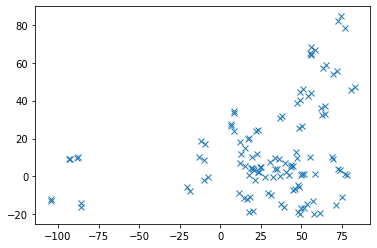

In [69]:
plt.plot(ak.flatten(a[10]["x"]),ak.flatten(a[10]["y"]),marker="x",linewidth=0)